In [1]:
%matplotlib notebook

plot some odor stim, light stim and raster plot and PSTH of the dose response in SI

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy import io as sio
import json
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys\\Or42bSF EtB\\step_with_flicker')
#save_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig2\\ephys')
save_path = 'Describe Path'

In [4]:
def plot_PSTH_flicker(data, odor_conc, savename, ylim, aq_rate=10000,
                      xlim=None, save_path=None,
                      sensory_experience=False, max_OB1_pressure=200,
                      odor_color='gold', lw_stim = 1,lw_PSTH = 0.1):
    # Odor conc comes in uM!
    if save_path is None:
        print('please provide savepath')

    try:
        odor = data['pressure [mbar]'] / max_OB1_pressure * odor_conc
    except KeyError:
        # This is only relevant for the 1 mM EtB case
        odor = data['pressure Ch2 [mbar]'] / max_OB1_pressure * odor_conc


    fig = plt.figure()
    ax1 = fig.add_subplot(411)
    ax1.plot(data['Time [s]'], odor, c=odor_color, lw=lw_stim)
    # ax1_right = ax1.twinx()
    # ax1_right.plot(data['Time [s]'], light, c='red', lw=lw)

    ax1.set_ylabel('EtB [uM]')
    # ax1_right.set_ylabel('uW/mm2')
    #####################################    
    ax2 = fig.add_subplot(412, sharex=ax1)
    ax2.plot(data['Time [s]'], data['light [uW/mm]'], c='r', lw=lw_stim)
    ax2.set_ylabel('Red light [uW/mm2]')
    
    #####################################
    ax3 = fig.add_subplot(413, sharex=ax1)
    ax3.set_rasterization_zorder(1)
    position = 0
    for counter, trial in enumerate(data.columns):
        if 'spikes_' in trial:
            ax3.eventplot(np.where(data[trial] == 1)[0] / aq_rate,
                          linewidth=0.05, lineoffsets=position,
                          color='k', zorder=0)
            position += 1

    ax4 = fig.add_subplot(414, sharex=ax1)

    ax4.plot(data['Time [s]'], data['PSTH [Hz]'], c='k', lw=lw_PSTH)
    ax4.plot(data['Time [s]'], data['PSTH [Hz]'] - data['PSTH SEM'],
             c='k', alpha=0.5, lw=lw_PSTH)
    ax4.plot(data['Time [s]'], data['PSTH [Hz]'] + data['PSTH SEM'],
             c='k', alpha=0.5, lw=lw_PSTH)
    ax4.set_ylim(ylim)

    ax4.set_ylabel('Firing rate [Hz]')

    if xlim is not None:
        ax1.set_xlim(xlim)

    ax4.set_xlabel('Time[s]')
    #fig.savefig(Path(save_path, savename), rasterized=True, dpi=300) # Uncomment to save

<IPython.core.display.Javascript object>


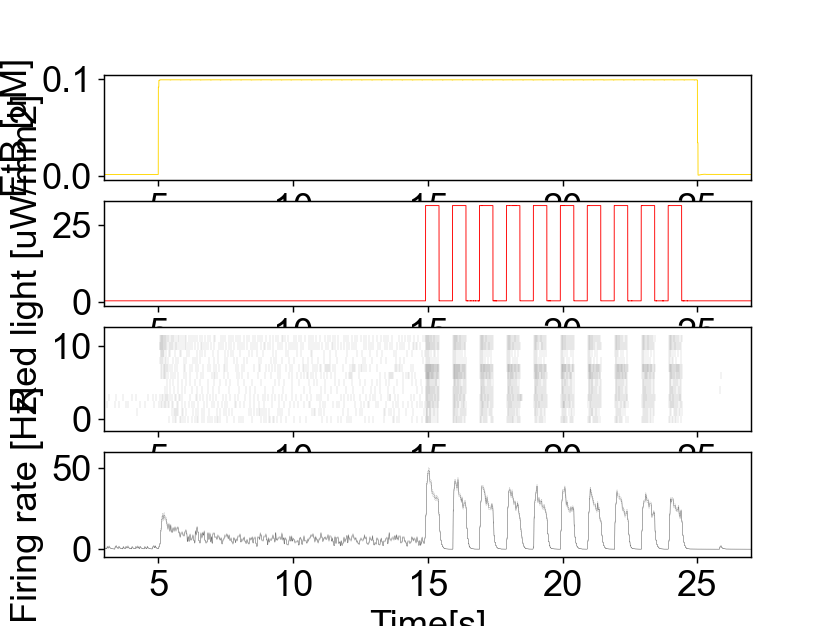

In [5]:
current_folder = Path(root_path, 'EtB100nM')
for current_file in current_folder.iterdir():
    if 'csv' in current_file.name:
        data = pd.read_csv(current_file)
        
plot_PSTH_flicker(data, odor_conc=0.10, savename='Fig3E_100nM_EtB_flicker.svg', 
                  ylim=(-5,60),xlim=(3,27), save_path=save_path,
                  lw_stim=0.5)

<IPython.core.display.Javascript object>


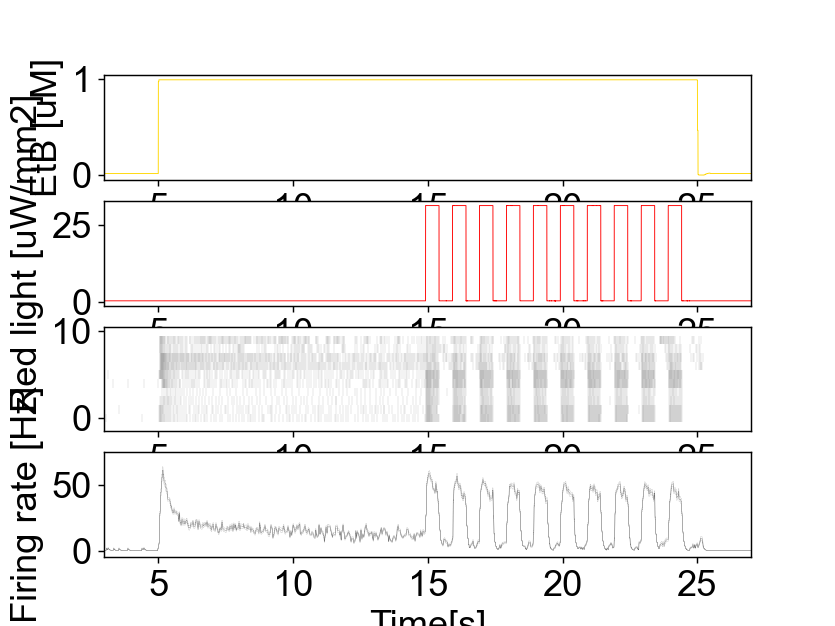

In [6]:
current_folder = Path(root_path, 'EtB1uM')
for current_file in current_folder.iterdir():
    if 'csv' in current_file.name:
        data = pd.read_csv(current_file)
        
plot_PSTH_flicker(data, odor_conc=1, savename='Fig3E_1uM_EtB_flicker.svg', 
                  ylim=(-5,75),xlim=(3,27), save_path=save_path,
                  lw_stim=0.5)

<IPython.core.display.Javascript object>


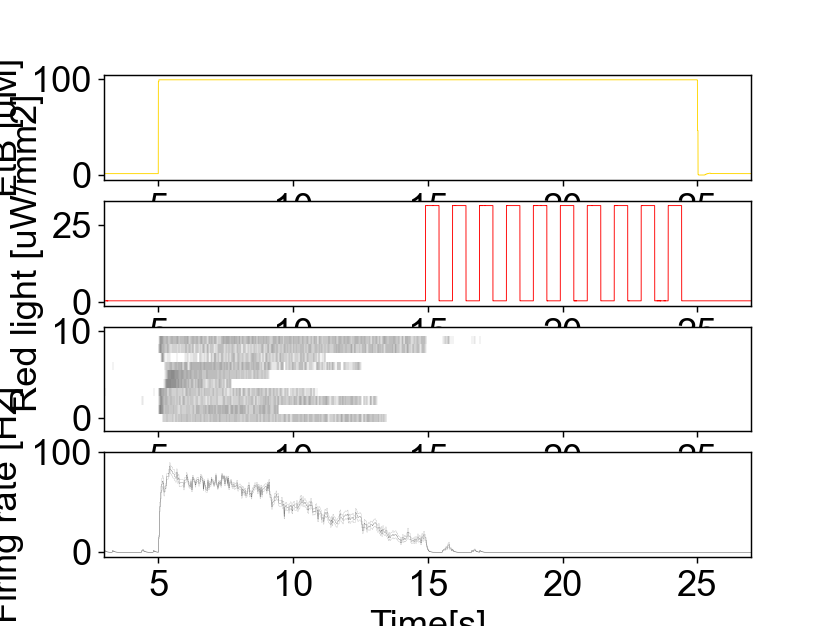

In [7]:
current_folder = Path(root_path, 'EtB100uM')
for current_file in current_folder.iterdir():
    if 'csv' in current_file.name:
        data = pd.read_csv(current_file)
        
plot_PSTH_flicker(data, odor_conc=100, savename='Fig3E_100uM_EtB_flicker.svg', 
                  ylim=(-5,100),xlim=(3,27), save_path=save_path,
                  lw_stim=0.5)